# Libraries: importing necessary libraries

In [1]:
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from getpass import getpass
import requests
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows',None)
import json
import time
from time import sleep
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import TextBlob

# Functions

In [2]:
# Function to clean lower, links, RT, blanks, etc.

def clean_up(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r'\d+','',s)
    s = re.sub('RT', ' ', s)
    s = re.sub(r'\W+',' ',s).strip()
    s = s.lower()
    return s

In [3]:
# Function to tokenize words
def tokenize(s):
    tokens = word_tokenize(s)    
    return tokens

In [4]:
# Function for stemming and lemmatizing
def stem_and_lemmatize(l):
    l_stem_lem = []
    ps = PorterStemmer()
    lm = WordNetLemmatizer()
    for w in l:
        w = ps.stem(w)
        w = lm.lemmatize(w)
        l_stem_lem.append(w)
    return l_stem_lem

In [5]:
# Function to remove 'stop words'
def remove_stopwords(l):
    stop_words = set(stopwords.words('english')) 
    return [word for word in l if word not in stop_words]

In [6]:
# Function to change into 1 or 0 negative and positive/neutral feelings and sentiments
def cleanOperation(x):
    if 'negative' in x:
        return '1'
    else:
        return '0'

# Twitter API

In [ ]:
# Enter Twitter bearer token
password = getpass() 

# Put Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token=password,
                       return_type = requests.Response,
                       wait_on_rate_limit=True)

In [ ]:
# Setting up 31 queries containing words related with depression, anxiety and suicide
query0 = '#depression OR #anxiety -is:retweet nullcast lang:en'
query1 = '#sadness OR #hapiness -is:retweet nullcast lang:en'
query2 = 'mental+health OR depression -is:retweet nullcast lang:en'
query3 = 'depressed OR wellness -is:retweet nullcast lang:en'
query4 = 'anxiety OR antidepressant -is:retweet nullcast lang:en'
query5 = 'sadness OR suicide -is:retweet nullcast lang:en'
query6 = 'bullying OR harm -is:retweet nullcast lang:en'
query7 = 'pill OR emotions -is:retweet nullcast lang:en'
query8 = 'abuse OR break+down -is:retweet nullcast lang:en'
query9 = 'cry OR failure -is:retweet nullcast lang:en'
query10 = 'suffering OR mental+illness -is:retweet nullcast lang:en'
query11 = 'panic+attack OR mental+fatigue -is:retweet nullcast lang:en'
query12 = 'frustration OR frustrating -is:retweet nullcast lang:en'
query13 = 'overthink OR overthinking -is:retweet nullcast lang:en'
query14 = 'negative OR positive -is:retweet nullcast lang:en'
query15 = 'pessimistic OR optimistic -is:retweet nullcast lang:en'
query16 = '#depression OR #anxiety absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query17 = '#sadness OR #hapiness absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query18 = 'mental+health OR depression absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query19 = 'depressed OR wellness absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query20 = 'anxiety OR antidepressant absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query21 = 'sadness OR suicide absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query22 = 'bullying OR harm absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query23 = 'pill OR emotions absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query24 = 'abuse OR break+down absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query25 = 'cry OR failure absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query26 = 'suffering OR mental+illness absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query27 = 'panic+attack OR mental+fatigue absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query28 = 'frustration OR frustrating absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query29 = 'overthink OR overthinking absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'
query30 = 'negative OR positive absolutely all always complete completely constant constantly definitely entire ever every everyone everything full must never nothing totally whole -is:retweet nullcast lang:en'


list_of_queries = [query0, query1, query2, query3, query4, query5, query6, query7, query8, query9, query10, query11,
                  query12, query13, query14, query15, query16, query17, query18, query19, query20, query21, query22, 
                   query23, query24, query25, query26, query27, query28, query29, query30]


In [ ]:
# List to store tweets to be retrieved
list_of_tweets = []

In [ ]:
# For loop to launch the 32 queries
for x in list_of_queries:
    n = 1
    while n!= 0:
        tweets = client.search_recent_tweets(query=x, tweet_fields=['lang', 'author_id', 'created_at', 'possibly_sensitive', 'source', 'public_metrics'], max_results=100)
        n-=1
        list_of_tweets.append(tweets)
        print('Query running...')
        sleep(90)

In [ ]:
# Reading the list of tweets in json format
for x in list_of_tweets:
    print(x.json())

In [ ]:
# Appending into json 
tweets = []
for x in list_of_tweets:
    tweets.append(x.json())

In [ ]:
# for i in tweets:
#     data = pd.json_normalize(tweets[i]['data'])
#     data = pd.json_normalize(i['data'])

In [ ]:
# Normalizing data (previous for loop not working; normalizing one by one manually)
data0 = pd.json_normalize(tweets[0]['data'])
data1 = pd.json_normalize(tweets[1]['data'])
data2 = pd.json_normalize(tweets[2]['data'])
data3 = pd.json_normalize(tweets[3]['data'])
data4 = pd.json_normalize(tweets[4]['data'])
data5 = pd.json_normalize(tweets[5]['data'])
data6 = pd.json_normalize(tweets[6]['data'])
data7 = pd.json_normalize(tweets[7]['data'])
data8 = pd.json_normalize(tweets[8]['data'])
data9 = pd.json_normalize(tweets[9]['data'])
data10 = pd.json_normalize(tweets[10]['data'])
data11 = pd.json_normalize(tweets[11]['data'])
data12 = pd.json_normalize(tweets[12]['data'])
data13 = pd.json_normalize(tweets[13]['data'])
data14 = pd.json_normalize(tweets[14]['data'])
data15 = pd.json_normalize(tweets[15]['data'])
data16 = pd.json_normalize(tweets[16]['data'])
data17 = pd.json_normalize(tweets[17]['data'])
data18 = pd.json_normalize(tweets[18]['data'])
data19 = pd.json_normalize(tweets[19]['data'])
data20 = pd.json_normalize(tweets[20]['data'])
data21 = pd.json_normalize(tweets[21]['data'])
data22 = pd.json_normalize(tweets[22]['data'])
data23 = pd.json_normalize(tweets[23]['data'])
data24 = pd.json_normalize(tweets[24]['data'])
data25 = pd.json_normalize(tweets[25]['data'])
data26 = pd.json_normalize(tweets[26]['data'])
data27 = pd.json_normalize(tweets[27]['data'])
data28 = pd.json_normalize(tweets[28]['data'])
data29 = pd.json_normalize(tweets[29]['data'])
data30 = pd.json_normalize(tweets[30]['data'])

# Loading datasets

Loading the three raw datasets that we will be working with. 

In [7]:
data1 = pd.read_csv('tweets.csv') # Contains unlabelled tweets related to suicide
data2 = pd.read_csv('sentiment_sample.csv') # Contains unlabelled random tweets
data3 = pd.read_csv('Mental-Health-Twitter.csv') # Contains tweets regarding mental health that have already been labelled

# Processing datasets

## Cleaning data1 
Dropping, reordering and standardizing header names

In [28]:
display(data1.head(3))
display(data1.shape)

,Unnamed: 0,possibly_sensitive,id,author_id,source,created_at,text,edit_history_tweet_ids,lang,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,withheld.copyright,withheld.country_codes
0,0,False,1586291536546779136,1586147134637735936,Twitter Web App,2022-10-29T09:39:08.000Z,"Depression, like other illnesses, is chronic, ...",['1586291536546779136'],en,0,0,0,0,NaN,NaN
1,1,False,1586291387418710016,4008120614,Twitter Web App,2022-10-29T09:38:33.000Z,I'm not supposed to be anything but wanting to...,['1586291387418710016'],en,0,0,0,0,NaN,NaN
2,2,False,1586290826543599616,1492873110881722369,Twitter Web App,2022-10-29T09:36:19.000Z,RT @trashpige0ns: @Author_VanessaF No one shou...,['1586290826543599616'],en,0,0,0,0,NaN,NaN


(13248, 15)

In [29]:
data1.columns

Index(['Unnamed: 0', 'possibly_sensitive', 'id', 'author_id', 'source',
       'created_at', 'text', 'edit_history_tweet_ids', 'lang',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'withheld.copyright', 'withheld.country_codes'],
      dtype='object')

In [30]:
data1 = data1.drop(['Unnamed: 0', 'possibly_sensitive', 'id', 'source',
       'edit_history_tweet_ids', 
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'withheld.copyright', 'withheld.country_codes', 'created_at'], axis = 1)

In [31]:
data1 = data1.rename(columns = {'author_id': 'author'})

In [32]:
data1 = data1[['author', 'text', 'lang']]

In [33]:
data1 = data1.drop_duplicates()

In [34]:
data1 = data1[data1['lang'] == 'en']

In [35]:
data1 = data1.drop(['lang', 'author'], axis = 1)

data1.shape

(10165, 1)

In [36]:
data1.head()

,text
0,"Depression, like other illnesses, is chronic, ..."
1,I'm not supposed to be anything but wanting to...
2,RT @trashpige0ns: @Author_VanessaF No one shou...
3,this is how to show a loved one you care: Have...
4,"RT @NormanSpivak: 2 / \nIn this work, we discu..."


In [37]:
%%time
data1["text_processed"]=data1["text"].apply(clean_up)
print('1 done')

data1.head()

1 done
Wall time: 150 ms


,text,text_processed
0,"Depression, like other illnesses, is chronic, ...",depression like other illnesses is chronic and...
1,I'm not supposed to be anything but wanting to...,i m not supposed to be anything but wanting to...
2,RT @trashpige0ns: @Author_VanessaF No one shou...,trashpigens author_vanessaf no one should feel...
3,this is how to show a loved one you care: Have...,this is how to show a loved one you care have ...
4,"RT @NormanSpivak: 2 / \nIn this work, we discu...",normanspivak in this work we discuss how disru...


## Label prediction data1

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
data1[['polarity', 'subjectivity']] = data1['text_processed'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in data1['text_processed'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        data1.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        data1.loc[index, 'sentiment'] = 'positive'
    else:
        data1.loc[index, 'sentiment'] = 'neutral'
        data1.loc[index, 'neg'] = neg
        data1.loc[index, 'neu'] = neu
        data1.loc[index, 'pos'] = pos
        data1.loc[index, 'compound'] = comp
data1.head(60)

In [ ]:
data1['sentiment'].value_counts()/len(data1['sentiment'])*100

In [ ]:
data1['sentiment'] = list(map(cleanOperation, data1['sentiment']))

In [ ]:
data1.head()

In [ ]:
data1.columns

In [ ]:
data1 = data1.drop(['polarity', 'subjectivity',
       'neg', 'neu', 'pos', 'compound'], axis = 1)

In [ ]:
data1 = data1.rename(columns = {'sentiment': 'label'})

In [ ]:
data1['label'].value_counts()

In [ ]:
data1.to_csv('suicide.csv')

## Cleaning data2

In [ ]:
display(data2.head(3))
display(data2.shape)

In [ ]:
data2 = data2.rename(columns = {'0' : 'target', '1467810369': 'id', 'Mon Apr 06 22:19:45 PDT 2009': 'date', 'NO_QUERY': 'flag', '_TheSpecialOne_': 'author', """@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D""": 'text'})
data2.columns

In [ ]:
data2.columns

In [ ]:
data2 = data2.drop(['Unnamed: 0', 'target', 'id', 'flag', 'date', 'author'], axis = 1)

In [ ]:
data2.head()

In [ ]:
%%time
data2["text_processed"]=data2["text"].apply(clean_up)
print('1 done')

data2.head()

## Label prediction data2

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
data2[['polarity', 'subjectivity']] = data2['text_processed'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in data2['text_processed'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        data2.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        data2.loc[index, 'sentiment'] = 'positive'
    else:
        data2.loc[index, 'sentiment'] = 'neutral'
        data2.loc[index, 'neg'] = neg
        data2.loc[index, 'neu'] = neu
        data2.loc[index, 'pos'] = pos
        data2.loc[index, 'compound'] = comp
data2.head(60)

In [ ]:
data2['sentiment'].value_counts()/len(data2['sentiment'])*100

In [ ]:
data2['sentiment'] = list(map(cleanOperation, data2['sentiment']))

In [ ]:
data2.columns

In [ ]:
data2 = data2.drop(['polarity', 'subjectivity',
       'neg', 'neu', 'pos', 'compound'], axis = 1)

In [ ]:
data2 = data2.rename(columns = {'sentiment': 'label'})

In [ ]:
data2['label'].value_counts()

In [ ]:
data2.to_csv('sentiment1.csv')

## Cleaning data3

In [43]:
display(data3.head(3))
display(data3.shape)

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1


(20000, 11)

In [44]:
# The information has been previously sorted: will shuffle it
data3 = data3.sample(frac = 1)

In [45]:
data3.head()
data3.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

In [46]:
data3 = data3.drop(['Unnamed: 0', 'post_id','followers',
       'friends', 'favourites', 'statuses', 'retweets', 'post_created', 'user_id'], axis = 1)

In [47]:
data3 = data3.rename(columns = {'post_text': 'text'})

In [48]:
data3 = data3[['text', 'label']]
data3 = data3.reset_index(drop = True)

In [49]:
data3.head()

,text,label
0,thats why im 45 pounds underweight.,1
1,"@_fawky words are powerful, be careful",1
2,RT @jephjacques: I propose adding JRGB (Joke R...,1
3,There's either an eyelash or an elephant in my...,1
4,Happy birthday @mtariq01 have a good one fam (...,0


In [55]:
%%time
data3["text_processed"]=data3["text"].apply(clean_up)
print('1 done')

1 done
Wall time: 188 ms


In [56]:
data3 = data3[['text', 'text_processed', 'label']]

In [57]:
data3.head()

,text,text_processed,label
0,thats why im 45 pounds underweight.,thats why im pounds underweight,1
1,"@_fawky words are powerful, be careful",_fawky words are powerful be careful,1
2,RT @jephjacques: I propose adding JRGB (Joke R...,jephjacques i propose adding jrgb joke replies...,1
3,There's either an eyelash or an elephant in my...,there s either an eyelash or an elephant in my...,1
4,Happy birthday @mtariq01 have a good one fam (...,happy birthday mtariq have a good one fam lite...,0


In [58]:
data3.to_csv('mental.csv')

# Modelling

## Suicide dataset

### Tokenizing, stemming, lemmatizing, removing stop words

In [24]:
suicide = pd.read_csv('suicide.csv', index_col = 0)
suicide.head()

,text,text_processed,label
0,"Depression, like other illnesses, is chronic, ...",depression like other illnesses is chronic and...,1
1,I'm not supposed to be anything but wanting to...,i m not supposed to be anything but wanting to...,1
2,RT @trashpige0ns: @Author_VanessaF No one shou...,trashpigens author_vanessaf no one should feel...,1
3,this is how to show a loved one you care: Have...,this is how to show a loved one you care have ...,0
4,"RT @NormanSpivak: 2 / \nIn this work, we discu...",normanspivak in this work we discuss how disru...,1


In [96]:
%%time
suicide['text_processed']=suicide['text_processed'].apply(tokenize)
print('1 done')
suicide["text_processed"]=suicide["text_processed"].apply(stem_and_lemmatize)
print('2 done')
suicide["text_processed"]=suicide["text_processed"].apply(remove_stopwords)

suicide.head()

1 done
2 done
Wall time: 9.2 s


,text,text_processed,label
0,"Depression, like other illnesses, is chronic, ...","[depress, like, ill, chronic, like, cancer, re...",1
1,I'm not supposed to be anything but wanting to...,"[suppos, anyth, want, die, know, wa, think, su...",1
2,RT @trashpige0ns: @Author_VanessaF No one shou...,"[trashpigen, author_vanessaf, one, feel, guilt...",1
3,this is how to show a loved one you care: Have...,"[thi, show, love, one, care, talk, anyon, feel...",0
4,"RT @NormanSpivak: 2 / \nIn this work, we discu...","[normanspivak, thi, work, discus, disrupt, mic...",1


In [101]:
suicide.to_csv('suicide_tableau.csv')

### NaiveBayes

In [102]:
# List of list of all words
list_of_words = suicide["text_processed"].tolist()
list_of_words

# Create one list of all words
bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

# Create frequency with words
freq_dist = FreqDist(bow)
top_1000 = freq_dist.most_common(1000)

In [103]:
# separating list of words and frequency
word_features, freq = [[x for x,y in top_1000],
      [y for x,y in top_1000]]

In [104]:
%%time
def find_features(lst, bow):
    word_features=list(bow)
    words = set(lst)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

word_features
features=[]
for i,l in enumerate(suicide["text_processed"]):
    s=[find_features(l,bow),suicide["label"].iloc[i]]
    z=tuple(s)
    features.append(z)
len(features)

Wall time: 3min


10165

In [105]:
%%time
# Split into train and test
train_set, test_set = features[1000:], features[:1000]

Wall time: 1 ms


In [106]:
%%time
classifier = nltk.NaiveBayesClassifier.train(train_set)

Wall time: 2min 48s


In [107]:
classifier.show_most_informative_features(20)

Most Informative Features
            via_protocol = True                0 : 1      =     49.2 : 1.0
                  analys = True                0 : 1      =     46.7 : 1.0
           digital_diari = True                0 : 1      =     45.4 : 1.0
                      bn = True                0 : 1      =     34.2 : 1.0
                  summer = True                0 : 1      =     29.3 : 1.0
              contracept = True                0 : 1      =     28.0 : 1.0
                  gather = True                0 : 1      =     26.8 : 1.0
                    rush = True                0 : 1      =     26.8 : 1.0
                    dodg = True                0 : 1      =     25.5 : 1.0
              intellectu = True                0 : 1      =     25.5 : 1.0
                    fire = True                1 : 0      =     24.1 : 1.0
              lightstick = True                1 : 0      =     23.7 : 1.0
                 quickli = True                0 : 1      =     22.0 : 1.0

In [108]:
%%time
nltk.classify.accuracy(classifier, test_set)

Wall time: 46.3 s


0.821

## Sentiment dataset

### Tokenizing, stemming, lemmatizing, removing stop words

In [25]:
sentiment = pd.read_csv('sentiment1.csv', index_col = 0)
sentiment.head()

,text,text_processed,label
0,"@TomFelton tom, what are you oding right now? ...",tomfelton tom what are you oding right now xx ...,0
1,mah pool is fixed. wanna go swimming? i cant.....,mah pool is fixed wanna go swimming i cant i j...,0
2,doesnt wanna go to work..only 4 hours tonight ...,doesnt wanna go to work only hours tonight tho,0
3,Just turned XXX,just turned xxx,0
4,"beddy times, work in the morning sad monkey",beddy times work in the morning sad monkey,1


In [11]:
%%time
sentiment['text_processed']=sentiment['text_processed'].apply(tokenize)
print('1 done')
sentiment["text_processed"]=sentiment["text_processed"].apply(stem_and_lemmatize)
print('2 done')
sentiment["text_processed"]=sentiment["text_processed"].apply(remove_stopwords)


sentiment.head()

1 done
2 done
Wall time: 1min 40s


,text,text_processed,label
0,"@TomFelton tom, what are you oding right now? ...","[tomfelton, tom, ode, right, xx, fan]",0
1,mah pool is fixed. wanna go swimming? i cant.....,"[mah, pool, fix, wan, na, go, swim, cant, got,...",0
2,doesnt wanna go to work..only 4 hours tonight ...,"[doesnt, wan, na, go, work, onli, hour, tonigh...",0
3,Just turned XXX,"[turn, xxx]",0
4,"beddy times, work in the morning sad monkey","[beddi, time, work, morn, sad, monkey]",1


### NaiveBayes

This dataset needs to be segmented, otherwise I cannot process it.

In [14]:
sentiment1 = sentiment[0:45000]
sentiment2 = sentiment[45001:90000]
sentiment3 = sentiment[90001:135000]
sentiment4 = sentiment[135000:184000]

In [16]:
# List of list of all words
list_of_words = sentiment1["text_processed"].tolist()
list_of_words

# Create one list of all words
bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

# Create frequency with words
freq_dist = FreqDist(bow)
top_1000 = freq_dist.most_common(1000)

In [17]:
# separating list of words and frequency
word_features, freq = [[x for x,y in top_1000],
      [y for x,y in top_1000]]

In [18]:
%%time
def find_features(lst, bow):
    word_features=list(bow)
    words = set(lst)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

word_features
features=[]
for i,l in enumerate(sentiment1["text_processed"]):
    s=[find_features(l,bow),sentiment1["label"].iloc[i]]
    z=tuple(s)
    features.append(z)
len(features)

MemoryError: 

In [74]:
%%time
# Split into train and test
train_set, test_set = features[1000:], features[:1000]

Wall time: 8.04 s


In [75]:
%%time
classifier = nltk.NaiveBayesClassifier.train(train_set)

KeyboardInterrupt: 

In [76]:
classifier.show_most_informative_features(20)

Most Informative Features
            via_protocol = True                0 : 1      =     49.2 : 1.0
                  analys = True                0 : 1      =     46.7 : 1.0
           digital_diari = True                0 : 1      =     45.4 : 1.0
                      bn = True                0 : 1      =     34.2 : 1.0
                  summer = True                0 : 1      =     29.3 : 1.0
              contracept = True                0 : 1      =     28.0 : 1.0
                  gather = True                0 : 1      =     26.8 : 1.0
                    rush = True                0 : 1      =     26.8 : 1.0
                    dodg = True                0 : 1      =     25.5 : 1.0
              intellectu = True                0 : 1      =     25.5 : 1.0
                    fire = True                1 : 0      =     24.1 : 1.0
              lightstick = True                1 : 0      =     23.7 : 1.0
                 quickli = True                0 : 1      =     22.0 : 1.0

In [77]:
%%time
nltk.classify.accuracy(classifier, test_set)

KeyboardInterrupt: 

## Mental dataset

### Tokenizing, stemming, lemmatizing, removing stop words

In [26]:
mental = pd.read_csv('mental.csv', index_col = 0)
mental.head()

,text,text_processed,label
0,thats why im 45 pounds underweight.,thats why im pounds underweight,1
1,"@_fawky words are powerful, be careful",_fawky words are powerful be careful,1
2,RT @jephjacques: I propose adding JRGB (Joke R...,jephjacques i propose adding jrgb joke replies...,1
3,There's either an eyelash or an elephant in my...,there s either an eyelash or an elephant in my...,1
4,Happy birthday @mtariq01 have a good one fam (...,happy birthday mtariq have a good one fam lite...,0


In [18]:
%%time
mental['text_processed']=mental['text_processed'].apply(tokenize)
print('1 done')
mental["text_processed"]=mental["text_processed"].apply(stem_and_lemmatize)
print('2 done')
mental["text_processed"]=mental["text_processed"].apply(remove_stopwords)


mental.head()

1 done
2 done
Wall time: 9.67 s


,text,text_processed,label
0,thats why im 45 pounds underweight.,"[whi, im, pound, underweight]",1
1,"@_fawky words are powerful, be careful","[_fawki, word, power, care]",1
2,RT @jephjacques: I propose adding JRGB (Joke R...,"[jephjacqu, propos, ad, jrgb, joke, repli, get...",1
3,There's either an eyelash or an elephant in my...,"[either, eyelash, eleph, eye, either, way, net...",1
4,Happy birthday @mtariq01 have a good one fam (...,"[happi, birthday, mtariq, good, one, fam, lite...",0


### NaiveBayes

In [20]:
# List of list of all words
list_of_words = mental["text_processed"].tolist()
list_of_words

# Create one list of all words
bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)

# Create frequency with words
freq_dist = FreqDist(bow)
top_1000 = freq_dist.most_common(1000)

In [21]:
# separating list of words and frequency
word_features, freq = [[x for x,y in top_1000],
      [y for x,y in top_1000]]

In [22]:
%%time
def find_features(lst, bow):
    word_features=list(bow)
    words = set(lst)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

word_features
features=[]
for i,l in enumerate(mental["text_processed"]):
    s=[find_features(l,bow),mental["label"].iloc[i]]
    z=tuple(s)
    features.append(z)
len(features)

Wall time: 5min 42s


20000

In [23]:
%%time
# Split into train and test
train_set, test_set = features[1000:], features[:1000]

Wall time: 998 µs


In [24]:
%%time
classifier = nltk.NaiveBayesClassifier.train(train_set)

Wall time: 5min 10s


In [25]:
classifier.show_most_informative_features(20)

Most Informative Features
         realdonaldtrump = True                0 : 1      =    163.2 : 1.0
                    user = True                0 : 1      =    137.7 : 1.0
               treatment = True                1 : 0      =    121.2 : 1.0
                   trump = True                0 : 1      =     86.5 : 1.0
                 overcom = True                1 : 0      =     82.2 : 1.0
                     joe = True                0 : 1      =     72.0 : 1.0
                 depress = True                1 : 0      =     46.5 : 1.0
                 russian = True                0 : 1      =     37.2 : 1.0
                  autism = True                1 : 0      =     34.0 : 1.0
                    zayn = True                0 : 1      =     33.7 : 1.0
                  russia = True                0 : 1      =     28.7 : 1.0
                thankyou = True                0 : 1      =     27.8 : 1.0
                  addict = True                1 : 0      =     25.4 : 1.0

In [26]:
%%time
nltk.classify.accuracy(classifier, test_set)

Wall time: 40.3 s


0.888

# Plotting

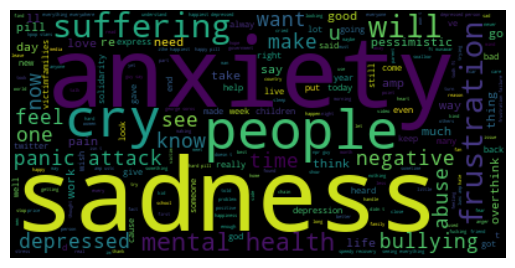

In [27]:
# Start with one review:
text = suicide['text_processed'].str.cat(sep=' ')
text = text.replace(' s ', '')
text = text.replace(' m ', '')
text = text.replace(' don ', '')
# dataset['customer_lifetime_value'].str.replace('%','')

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

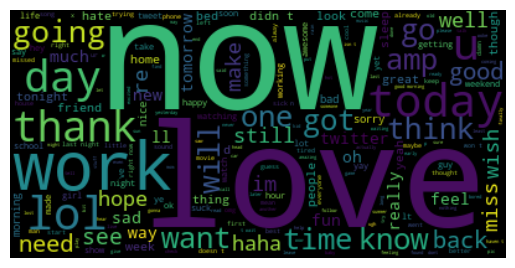

In [28]:
# Start with one review:
text1 = sentiment['text_processed'].str.cat(sep=' ')
text1 = text1.replace(' s ', '')
text1 = text1.replace(' m ', '')
text1 = text1.replace(' don ', '')
text1 = text1.replace(' quot ', '')


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

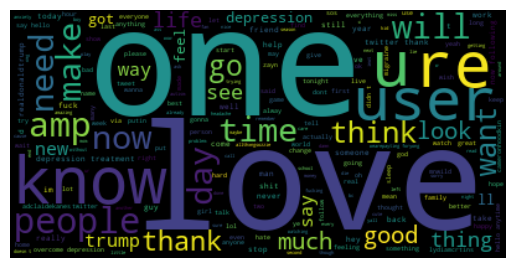

In [29]:
# Start with one review:
text2 = mental['text_processed'].str.cat(sep=' ')
text2 = text2.replace(' s ', '')
text2 = text2.replace(' m ', '')
text2 = text2.replace(' don ', '')

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()